单变量线性回归

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号


In [31]:
path='data/regress_data1.csv'
data=pd.read_csv(path)
data.head()

,人口,收益
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [32]:
data.describe()

,人口,收益
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


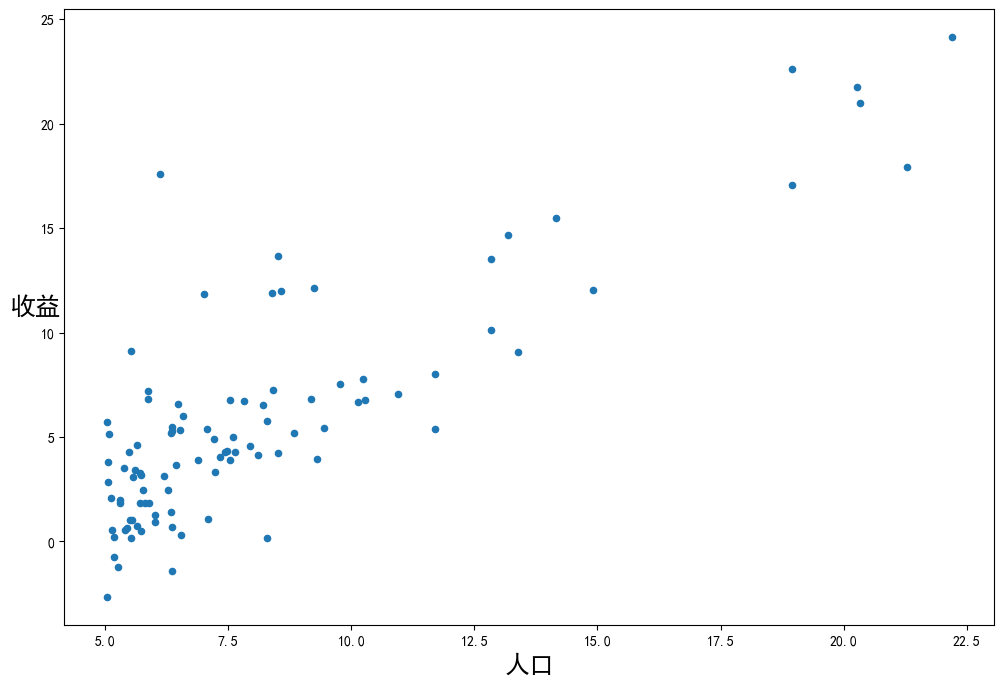

In [33]:
#散点图绘制
data.plot(kind='scatter',x='人口',y='收益',figsize=(12,8))
plt.xlabel(xlabel='人口',fontsize=18)
plt.ylabel('收益',rotation=0,fontsize=18)
plt.show()

In [34]:
#使用梯度下降实现线性回归，最小化代价函数
def computeCost(X,y,w):
    """
    特征矩阵X
    标签向量y
    权重向量w

    返回值：代价函数值
    """

    inner=np.power(X @ w - y,2) #矩阵乘法@ #计算预测值与实际值差的平方和
    return np.sum(inner)/(2*len(X)) #平方和求和除以样本数量的2倍得到代价函数值

In [35]:
data.insert(0,'Ones',1)#插入名'Ones'的值全1的列到data的第一列
data

,Ones,人口,收益
0,1,6.1101,17.59200
1,1,5.5277,9.13020
2,1,8.5186,13.66200
3,1,7.0032,11.85400
4,1,5.8598,6.82330
...,...,...,...
92,1,5.8707,7.20290
93,1,5.3054,1.98690
94,1,8.2934,0.14454
95,1,13.3940,9.05510


In [36]:
cols=data.shape[1]#data列数
X=data.iloc[:,:cols-1]#除最后一列外的所有列作为特征矩阵X
y=data.iloc[:,cols-1:]#最后一列作为目标变量y,直接替换-1时，返回的不是数据框，导致后面计算变成311

In [37]:
X.head() #前五行

,Ones,人口
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598


In [38]:
y.head()

,收益
0,17.5920
1,9.1302
2,13.6620
3,11.8540
4,6.8233


In [39]:
X=X.values
y=y.values
w=np.zeros((X.shape[1],1))
w

array([[0.],
       [0.]])

In [40]:
X.shape,w.shape,y.shape

((97, 2), (2, 1), (97, 1))

In [41]:
computeCost(X,y,w)

32.072733877455676

批量梯度下降

In [42]:
def batch_gradientDescent(X,y,w,alpha,count):
    """
    特征矩阵X
    标签向量y
    权重向量w
    学习率alpha
    迭代次数count

    返回：
    更新后权重向量w
    每次迭代的代数函数值列表costs
    """

    costs=[]

    #对每个样本迭代
    for i in range(count):
        #使用公式更新权重向量
        w=w-(X.T @(X@w-y))*alpha/len(X)

        #计算代价函数值
        cost=computeCost(X,y,w)
        costs.append(cost)

        if i%100==0:
            print("在第{}次迭代中，cost的值为{}。".format(i,cost))
        
    return w,costs

In [43]:
alpha=0.01
iters=2000

w,cost=batch_gradientDescent(X,y,w,alpha,iters)

在第0次迭代中，cost的值为6.737190464870007。
在第100次迭代中，cost的值为5.476362817272741。
在第200次迭代中，cost的值为5.173634551165022。
在第300次迭代中，cost的值为4.962606493117519。
在第400次迭代中，cost的值为4.815501494116686。
在第500次迭代中，cost的值为4.712956453749759。
在第600次迭代中，cost的值为4.6414735988143185。
在第700次迭代中，cost的值为4.591643801766726。
在第800次迭代中，cost的值为4.556908078409751。
在第900次迭代中，cost的值为4.532694243543436。
在第1000次迭代中，cost的值为4.515815084502823。
在第1100次迭代中，cost的值为4.504048835517841。
在第1200次迭代中，cost的值为4.495846731678219。
在第1300次迭代中，cost的值为4.490129148489064。
在第1400次迭代中，cost的值为4.4861434933249615。
在第1500次迭代中，cost的值为4.483365143354072。
在第1600次迭代中，cost的值为4.481428390613829。
在第1700次迭代中，cost的值为4.480078304693718。
在第1800次迭代中，cost的值为4.479137176818275。
在第1900次迭代中，cost的值为4.478481128440361。


In [44]:
print(w)
print()
print(computeCost(X,y,w))

[[-3.78806857]
 [ 1.18221277]]

4.478027609879971


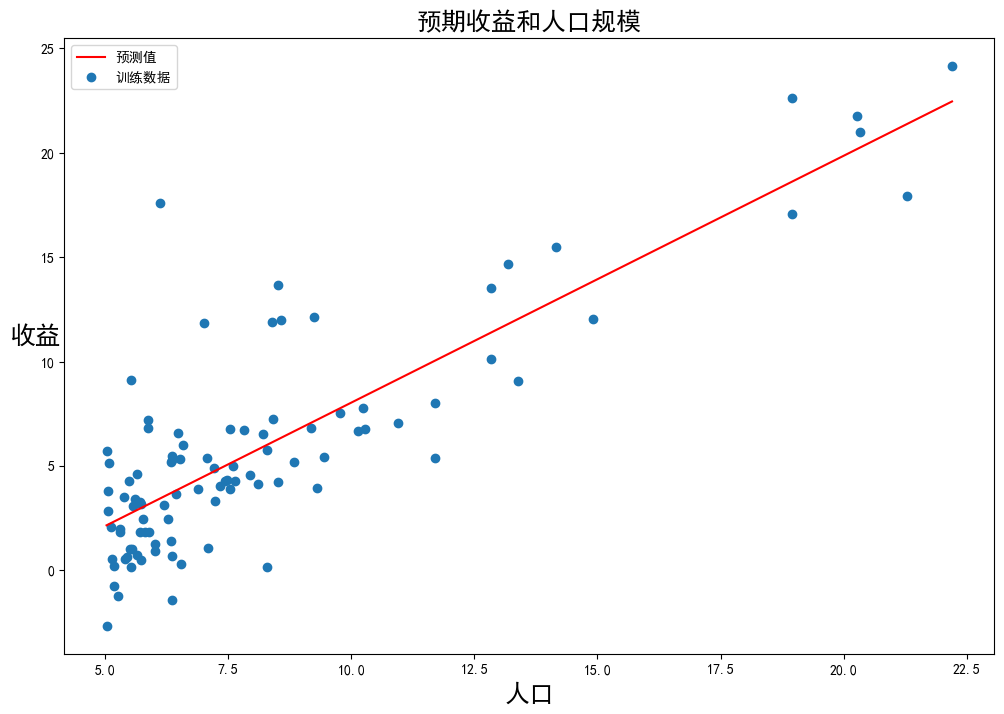

In [45]:
#可视化线性模型
x=np.linspace(data['人口'].min(),data['人口'].max(),100)
f=w[0,0]+(w[1,0]*x)

#创建图形和轴对象
fig,ax=plt.subplots(figsize=(12,8))
#绘制预测值曲线
ax.plot(x,f,'r',label='预测值')
ax.scatter(data['人口'],data['收益'],label='训练数据')
ax.legend(loc=2)

ax.set_xlabel('人口',fontsize=18)
ax.set_ylabel('收益',rotation=0,fontsize=18)

ax.set_title('预期收益和人口规模',fontsize=18)

plt.show()

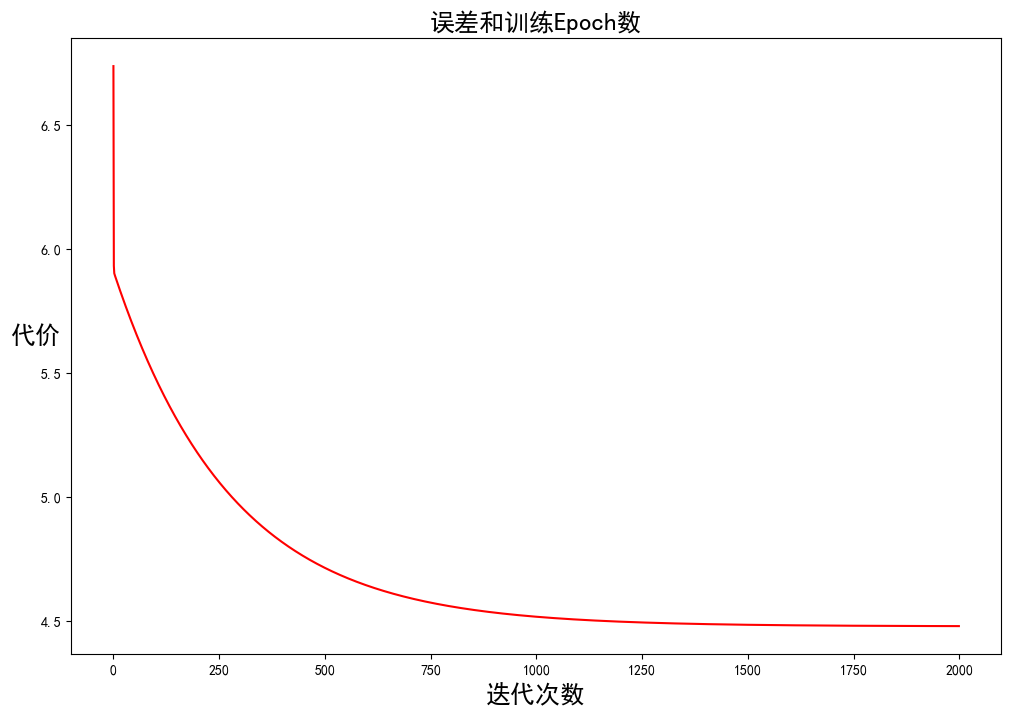

In [46]:
# 创建图形和轴对象
fig, ax = plt.subplots(figsize=(12, 8))
# 绘制代价随迭代次数的变化曲线
ax.plot(np.arange(iters), cost, 'r')
# 设置x轴和y轴标签
ax.set_xlabel('迭代次数', fontsize=18)
ax.set_ylabel('代价', rotation=0, fontsize=18)
# 设置图标题
ax.set_title('误差和训练Epoch数', fontsize=18)
# 显示图形
plt.show()

多变量线性回归

In [47]:
path='data/regress_data2.csv'
data2=pd.read_csv(path)
data2.head()

,面积,房间数,价格
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [48]:
#标准化数据
data2=(data2-data2.mean())/data2.std()
data2.head()

,面积,房间数,价格
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


In [49]:
#数据预处理
data2.insert(0, 'Ones', 1)
# 设置X（训练数据）和y（目标变量）
cols = data2.shape[1]
X2 = data2.iloc[:, 0:cols - 1]
y2 = data2.iloc[:, cols - 1:cols]
# 转换为数组并初始化theta
X2 = X2.values
y2 = y2.values
w2 = np.zeros((3, 1))
# 在数据集上进行线性回归
w2, cost2 = batch_gradientDescent(X2, y2, w2, alpha, iters)

在第0次迭代中，cost的值为0.4805491041076719。
在第100次迭代中，cost的值为0.18209443801333897。
在第200次迭代中，cost的值为0.14793824957386834。
在第300次迭代中，cost的值为0.1377591345050687。
在第400次迭代中，cost的值为0.13366037772496117。
在第500次迭代中，cost的值为0.1319404652949001。
在第600次迭代中，cost的值为0.13121540352412622。
在第700次迭代中，cost的值为0.13090958448719198。
在第800次迭代中，cost的值为0.13078058791637864。
在第900次迭代中，cost的值为0.13072617594607358。
在第1000次迭代中，cost的值为0.13070322444853422。
在第1100次迭代中，cost的值为0.1306935432832584。
在第1200次迭代中，cost的值为0.13068945967339027。
在第1300次迭代中，cost的值为0.1306877371669466。
在第1400次迭代中，cost的值为0.13068701059694005。
在第1500次迭代中，cost的值为0.13068670412262967。
在第1600次迭代中，cost的值为0.13068657484877846。
在第1700次迭代中，cost的值为0.130686520319808。
在第1800次迭代中，cost的值为0.13068649731895685。
在第1900次迭代中，cost的值为0.13068648761697357。


In [50]:
computeCost(X2, y2, w2)

0.13068648355046528

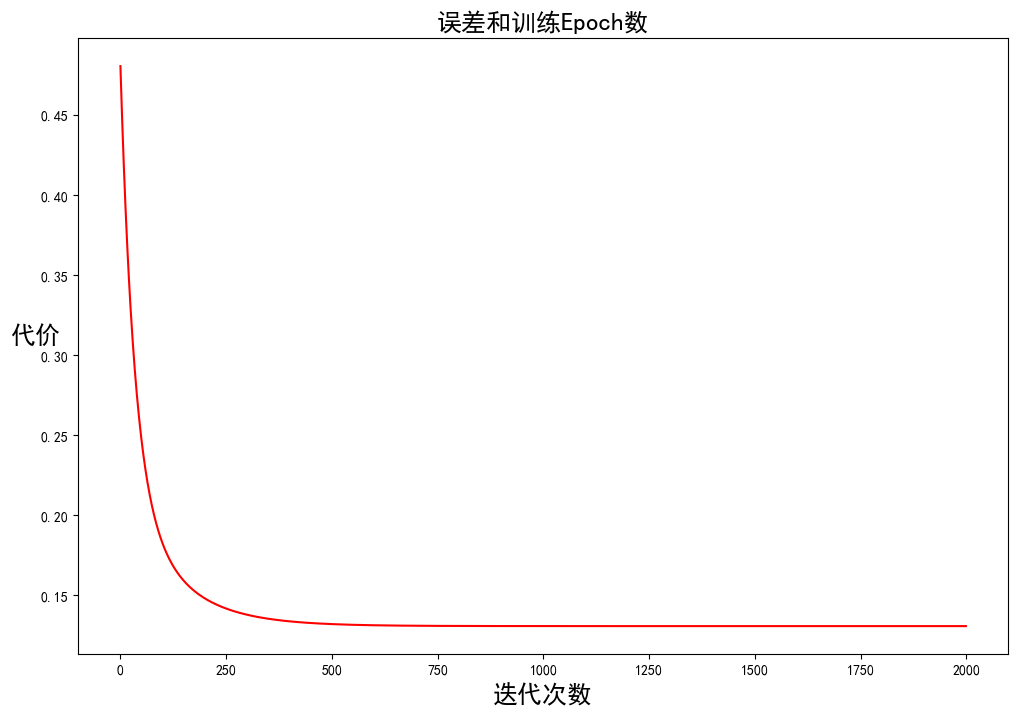

In [51]:
# 创建一个大小为 (12, 8) 的画布和坐标轴对象
fig, ax = plt.subplots(figsize=(12, 8))
# 在坐标轴上绘制代价函数 cost2 随迭代次数 iters 的变化曲线，使用红色线条
ax.plot(np.arange(iters), cost2, 'r')
# 设置 x 轴标签为 "迭代次数",字体大小为 18
ax.set_xlabel('迭代次数', fontsize=18)
# 设置 y 轴标签为 "代价",旋转角度为 0,字体大小为 18
ax.set_ylabel('代价', rotation=0, fontsize=18)
# 设置图表标题为 "误差和训练Epoch数",字体大小为 18
ax.set_title('误差和训练Epoch数', fontsize=18)
# 显示图表
plt.show()

In [52]:
# 导入线性回归模型
from sklearn.linear_model import LinearRegression

# 创建线性回归模型对象
model = LinearRegression()

# 使用训练数据 X 和标签 y 对模型进行拟合
model.fit(X, y)

LinearRegression()

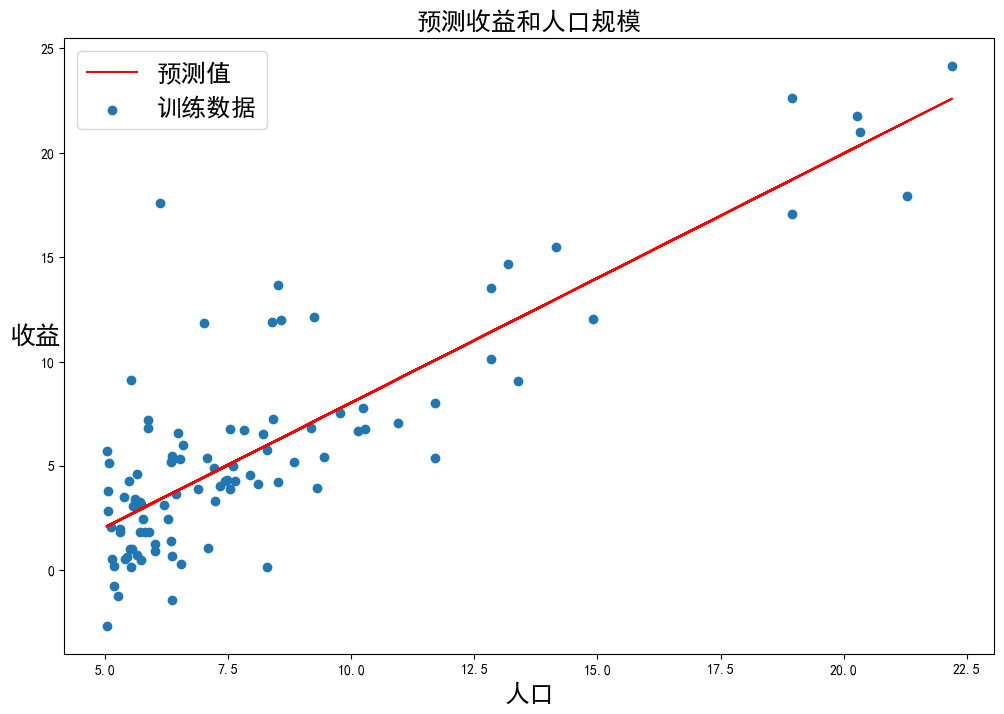

In [53]:
# 取特征矩阵 X 的第二列作为自变量 x
x = X[:, 1]
# 对模型进行预测，并将预测结果展平为一维数组 f
f = model.predict(X).flatten()
# 创建画布和坐标轴对象
fig, ax = plt.subplots(figsize=(12, 8))
# 在坐标轴上绘制预测值 f 随人口规模 x 的变化曲线，使用红色线条，并添加标签
ax.plot(x, f, 'r', label='预测值')
# 在坐标轴上绘制训练数据点的散点图，并添加标签
ax.scatter(data['人口'], data['收益'], label='训练数据')
# 显示图例，并设置位置和字体大小
ax.legend(loc=2, fontsize=18)
# 设置 x 轴标签和字体大小
ax.set_xlabel('人口', fontsize=18)
# 设置 y 轴标签、旋转角度和字体大小
ax.set_ylabel('收益', rotation=0, fontsize=18)
# 设置图表标题和字体大小
ax.set_title('预测收益和人口规模', fontsize=18)
# 显示图表
plt.show()

L2正则化

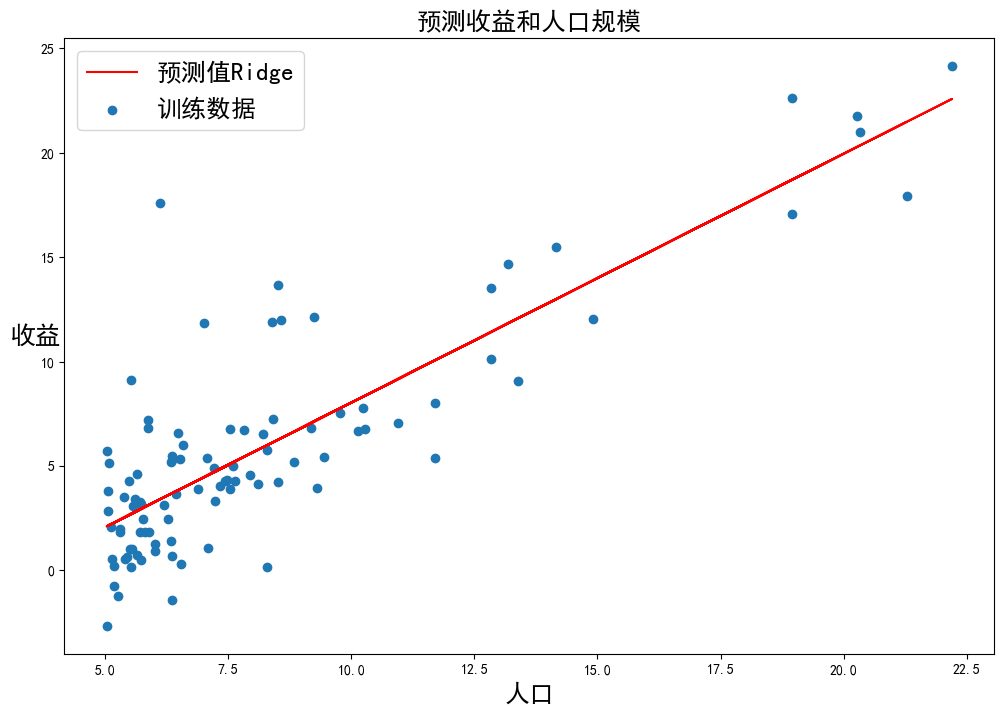

In [54]:
#导入岭回归模型
from sklearn.linear_model import Ridge
model=Ridge()
model.fit(X,y)

x2=X[:,1]
f2=model.predict(X).flatten()

fig,ax=plt.subplots(figsize=(12,8))
ax.plot(x2,f2,'r',label='预测值Ridge')
ax.scatter(data['人口'], data['收益'], label='训练数据')
ax.legend(loc=2, fontsize=18)
ax.set_xlabel('人口', fontsize=18)
ax.set_ylabel('收益', rotation=0, fontsize=18)
ax.set_title('预测收益和人口规模', fontsize=18)
plt.show()

L1正则化

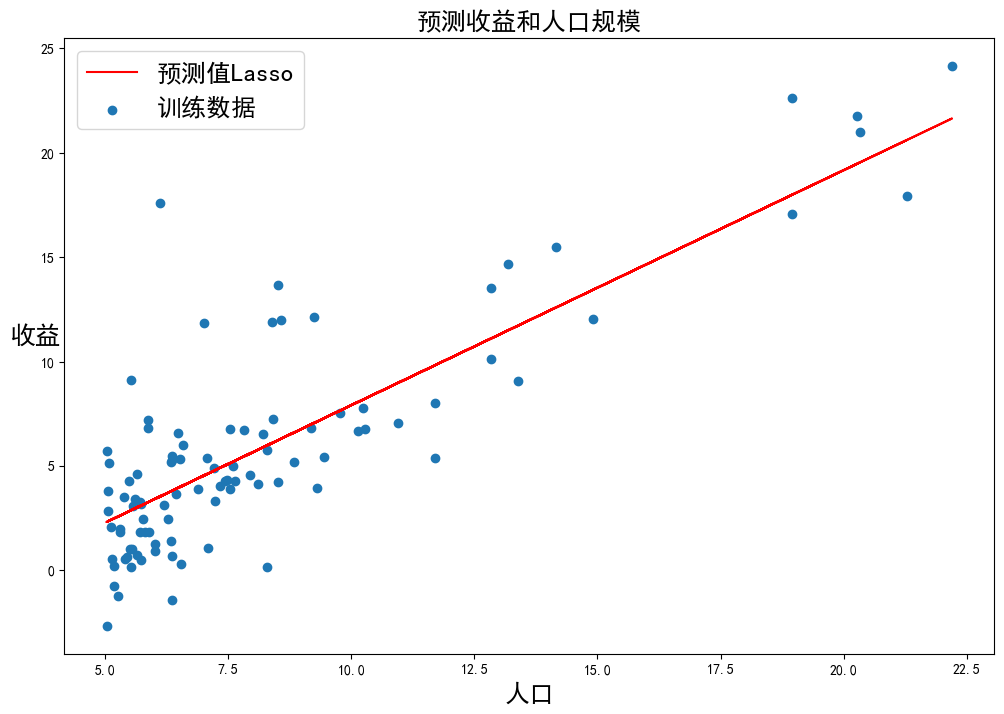

In [55]:
from sklearn.linear_model import Lasso
model=Lasso()
model.fit(X,y)
x3= X[:, 1]
f3 = model.predict(X).flatten()

fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(x3, f3, 'r', label='预测值Lasso')
ax.scatter(data['人口'], data['收益'], label='训练数据')
ax.legend(loc=2, fontsize=18)
ax.set_xlabel('人口', fontsize=18)
ax.set_ylabel('收益', rotation=0, fontsize=18)
ax.set_title('预测收益和人口规模', fontsize=18)
plt.show()

调参

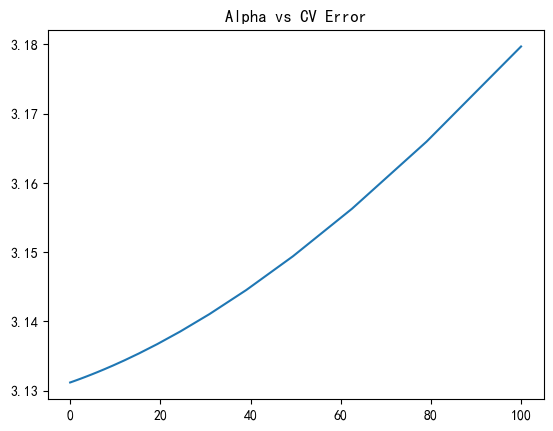

In [56]:
from sklearn.model_selection import cross_val_score

alphas=np.logspace(-3,2,50)
test_scores=[]

for alpha in alphas:
    clf=Ridge(alpha)
    test_score=np.sqrt(-cross_val_score(clf,X,y,cv=5,scoring='neg_mean_squared_error'))
    test_scores.append(np.mean(test_score))


plt.plot(alphas,test_scores)
plt.title("Alpha vs CV Error")
plt.show()

In [57]:
def LSM(X, y):
    # 计算矩阵X的转置与X相乘，再求逆矩阵，最后将结果与X的转置相乘，再与向量y相乘，得到权重w
    w = np.linalg.inv(X.T@X)@X.T@y#X.T@X等价于X.T.dot(X)
    return w

In [58]:
final_w2=LSM(X, y)#感觉和批量梯度下降的theta的值有点差距
final_w2

array([[-3.89578088],
       [ 1.19303364]])